In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


List The Data of 5 Months 

In [2]:
 df1 = pd.read_csv(r"C:\Users\lenovo\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_January_2019.csv")
 df2 = pd.read_csv(r"C:\Users\lenovo\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_February_2019.csv")
 df3 = pd.read_csv(r"C:\Users\lenovo\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_March_2019.csv")
df4 =  pd.read_csv(r"C:\Users\lenovo\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_April_2019.csv")
df5 =  pd.read_csv(r"C:\Users\lenovo\Downloads\Pandas-Data-Science-Tasks-master\Pandas-Data-Science-Tasks-master\SalesAnalysis\Sales_Data\Sales_May_2019.csv")
 
 

In [3]:
dataset = pd.concat([df1,df2,df3,df4,df5],ignore_index = True)
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
dataset.shape

(72003, 6)

Best Months for Sales ? How much was Earned That month


In [5]:
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"],  format='%m/%d/%y %H:%M', errors='coerce')
dataset["Month"] = dataset["Order Date"].dt.month
dataset.head()

                        


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1.0
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1.0
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1.0
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1.0
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1.0


In [29]:
dataset.isnull().sum()


Order ID              0
Product               0
Quantity Ordered    137
Price Each          137
Order Date          137
Purchase Address      0
Month               137
Sales               137
dtype: int64

In [7]:
df = dataset[dataset.isna().any(axis = 1)]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
664,NaN,NaN,NaN,NaN,NaT,NaN,NaN
678,NaN,NaN,NaN,NaN,NaT,NaN,NaN
797,NaN,NaN,NaN,NaN,NaT,NaN,NaN
876,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1073,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address,NaN


In [8]:
dataset = dataset.dropna(how='all')
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1.0
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1.0
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1.0
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1.0
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1.0


In [9]:
dataset.shape

(71801, 7)

In [10]:
dataset['Quantity Ordered'] = pd.to_numeric(dataset['Quantity Ordered'], errors='coerce')
dataset['Price Each'] = pd.to_numeric(dataset['Price Each'], errors='coerce')
dataset['Sales'] = dataset['Quantity Ordered']*dataset['Price Each']
dataset.head




,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1.0,700.00
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1.0,14.95
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1.0,23.98
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1.0,149.99
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1.0,11.99


In [14]:
df6 = dataset.groupby('Month').agg({"Sales" : "sum"})
print(df6)

            Sales
Month            
1.0    1813586.44
2.0    2202022.42
3.0    2807100.38
4.0    3390670.24
5.0    3152606.75
6.0       2537.34


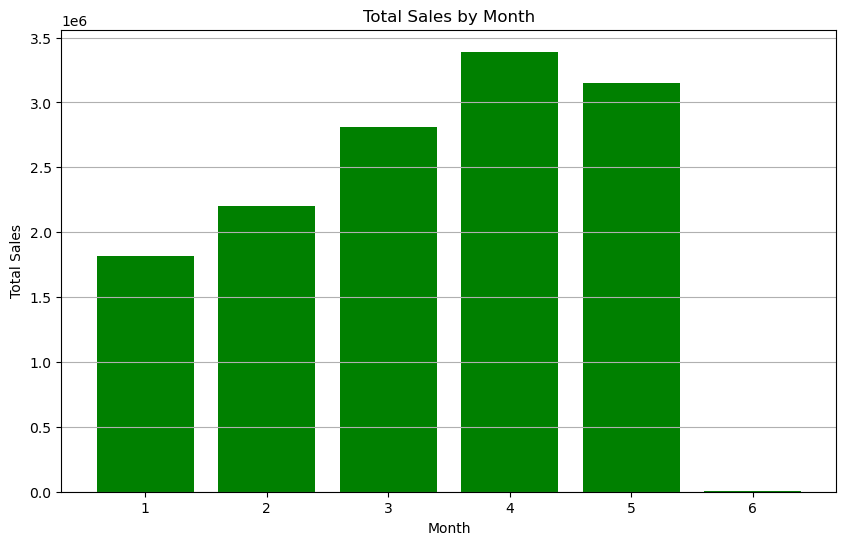

In [23]:
plt.figure(figsize=(10, 6))
plt.bar(df6.index, df6['Sales'], color='green')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

Which City Had the Highest Number Of Sales

In [39]:
def Ex_city(address):
    p = address.split(',')
    if len(p)>1:
        return p[1].strip()
    return ""
def Ex_state(address):
    p = address.split(',')
    if len(p)>2:
        return p[2].strip()
    return ""

dataset['City'] = dataset["Purchase Address"].apply(lambda x: Ex_city(x)+" "+Ex_state(x))
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1.0,700.00,Boston MA 02215
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1.0,14.95,Portland OR 97035
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1.0,23.98,San Francisco CA 94016
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1.0,149.99,Los Angeles CA 90001
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1.0,11.99,Austin TX 73301


In [56]:
df7 = dataset.groupby('City').agg({"Sales" : "sum"})
df8 = df7.sort_values(by = 'Sales',ascending = False)
print(df8)

                             Sales
City                              
San Francisco CA 94016  3263300.26
Los Angeles CA 90001    2110853.85
New York City NY 10001  1817851.22
Boston MA 02215         1398204.53
Atlanta GA 30301        1081259.08
Dallas TX 75001         1070612.19
Seattle WA 98101        1018899.37
Portland OR 97035        739604.69
Austin TX 73301          684352.55
Portland ME 04101        183585.83
                              0.00


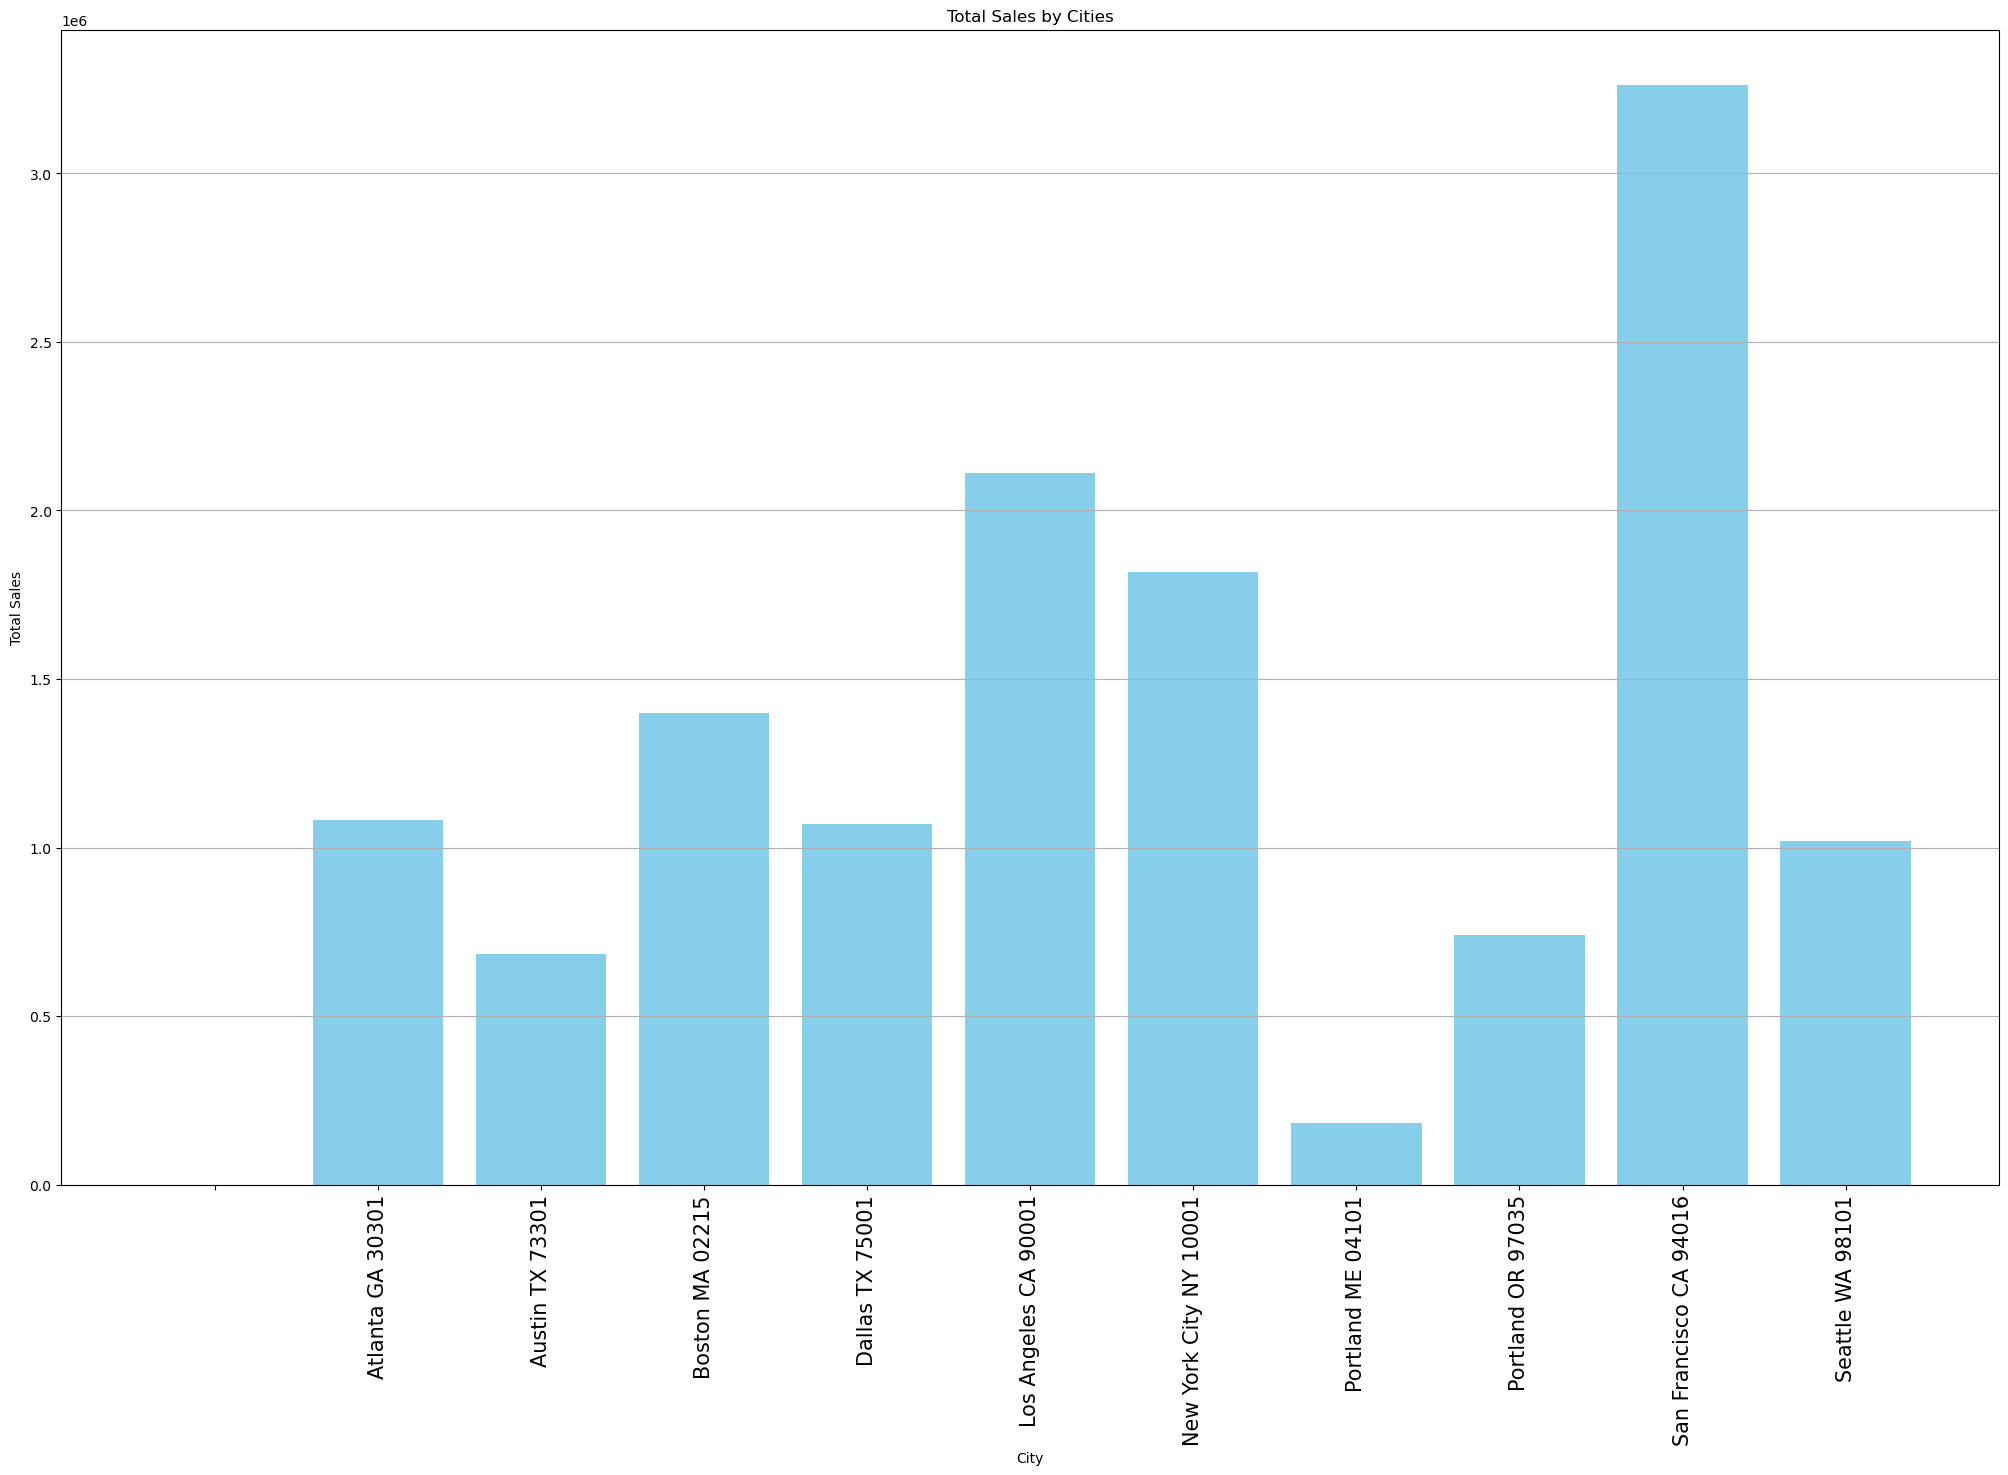

In [50]:
plt.figure(figsize=(25, 15))
plt.bar(df7.index, df7['Sales'], color='skyblue')
plt.title('Total Sales by Cities')
plt.xticks(df7.index, rotation ='vertical' , size = 15)
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.grid(axis='y')
plt.show()

 What Time should we display advertisements to maximize likelihood customer's buying product ?

In [58]:
dataset["Order Date"] = pd.to_datetime(dataset["Order Date"],  format='%m/%d/%y %H:%M', errors='coerce')
dataset["Time"] = dataset["Order Date"].dt.hour
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,141234,iPhone,1.0,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1.0,700.00,Boston MA 02215,21.0
1,141235,Lightning Charging Cable,1.0,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1.0,14.95,Portland OR 97035,14.0
2,141236,Wired Headphones,2.0,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1.0,23.98,San Francisco CA 94016,13.0
3,141237,27in FHD Monitor,1.0,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1.0,149.99,Los Angeles CA 90001,20.0
4,141238,Wired Headphones,1.0,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1.0,11.99,Austin TX 73301,11.0


In [59]:
df9 = dataset.groupby('Time').agg({"Sales" : "sum"})
df10 = df9.sort_values(by = 'Sales',ascending = False)
print(df10)

          Sales
Time           
12.0  943144.24
19.0  930365.53
18.0  893628.95
11.0  885557.92
20.0  860210.12
13.0  825178.75
17.0  792507.53
14.0  786326.89
21.0  782353.55
10.0  768131.85
16.0  760406.58
15.0  726101.88
9.0   671986.78
22.0  637175.20
8.0   469991.26
23.0  462148.52
0.0   280332.03
7.0   269597.92
1.0   180202.73
6.0   157517.53
2.0    85501.32
5.0    84917.83
4.0    60376.95
3.0    54861.71


C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


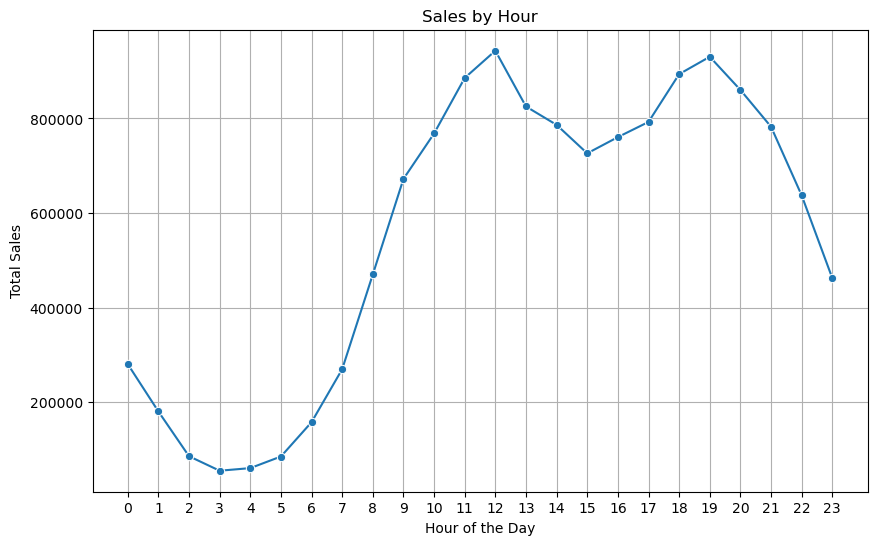

In [62]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df10, x=df10.index, y='Sales', marker='o')
plt.title('Sales by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(0, 24))  
plt.grid(True)
plt.show()



Product that sold Togethor

In [72]:
df11 = dataset[dataset['Order ID'].duplicated(keep= False)]
df11['Grouped'] = df11.groupby('Order ID')['Product'].transform(lambda x: ',' .join(x))
df11 = df11[['Order ID' ,'Grouped' ]].drop_duplicates()
df11.head()

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


Product that Sold Most

In [122]:
df12 = dataset.groupby('Product').agg({"Sales" : "sum"})

df13 = df12.sort_values(by= 'Sales',ascending = False)
df12.reset_index(inplace=True)
print(df13)

      Product     Sales  Price Each
5935   iPhone  532700.0       700.0
5523   iPhone  532700.0       700.0
5537   iPhone  532700.0       700.0
5536   iPhone  532700.0       700.0
5535   iPhone  532700.0       700.0
...       ...       ...         ...
3345  Product       0.0         NaN
3346  Product       0.0         NaN
3347  Product       0.0         NaN
3348  Product       0.0         NaN
3311  Product       0.0         NaN

[5936 rows x 3 columns]


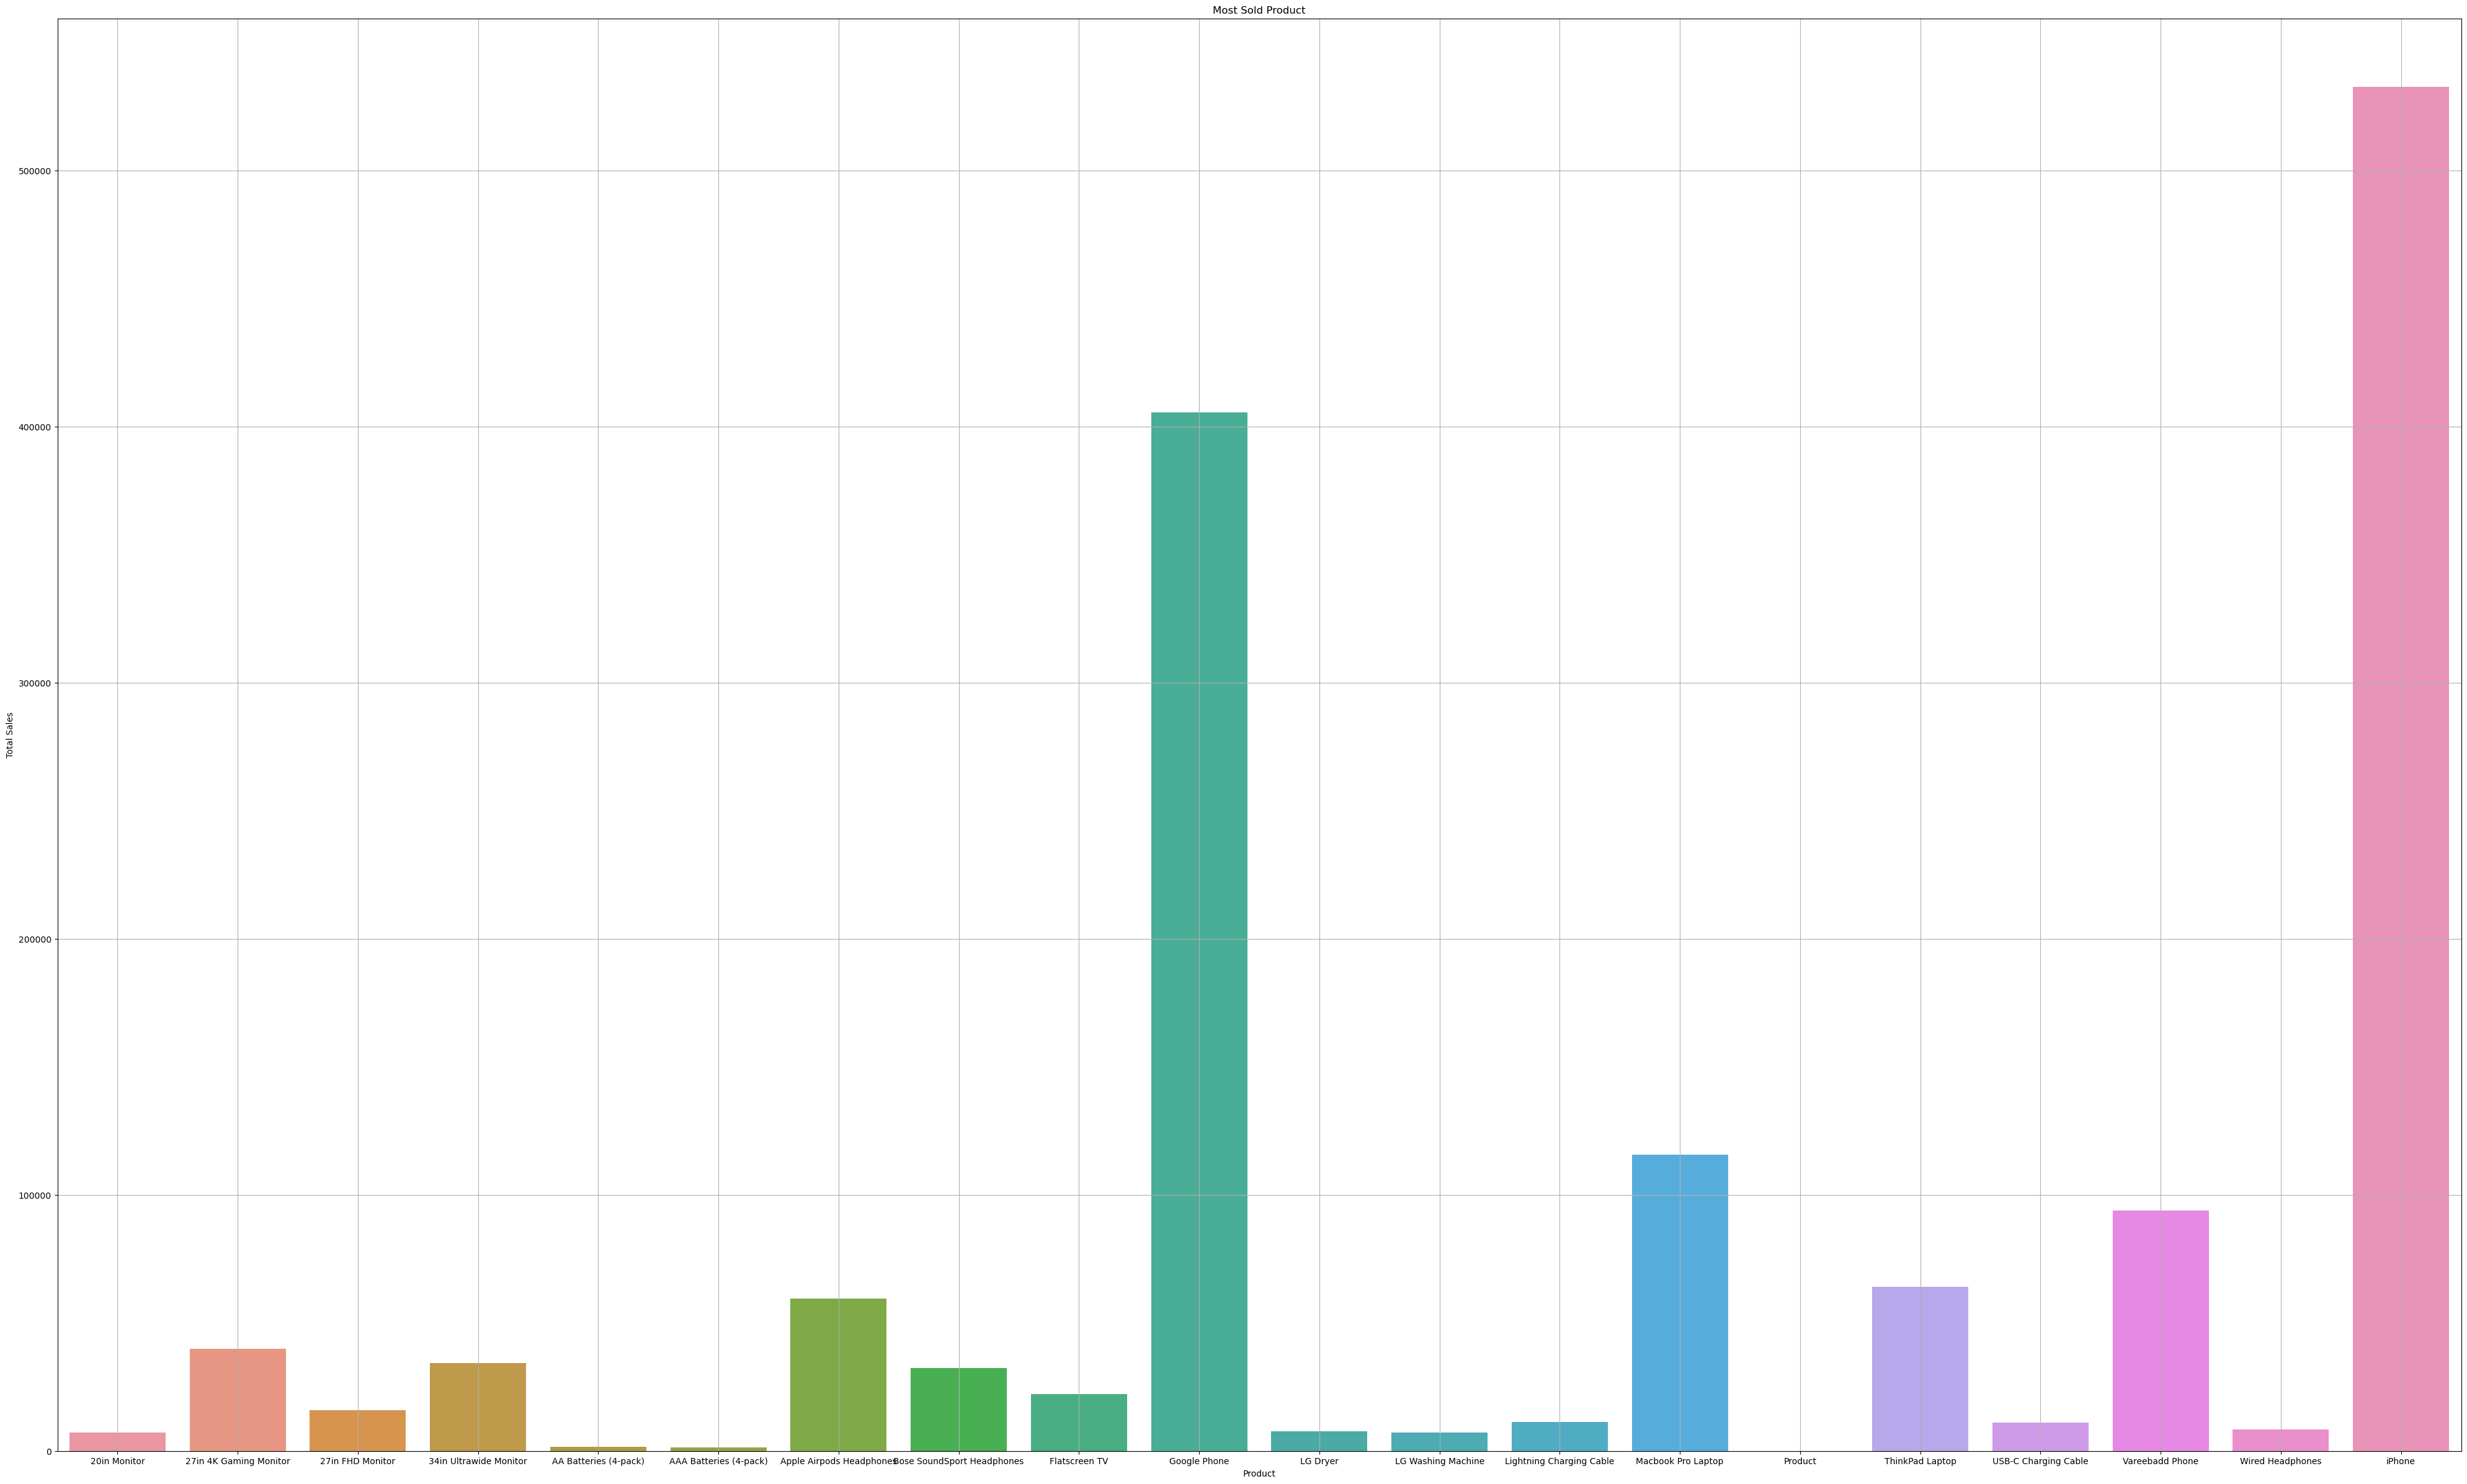

In [123]:

plt.figure(figsize=(50, 30))
sns.barplot(x='Product', y='Sales', data=df12)
plt.title('Most Sold Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [113]:
df14 = dataset.groupby('Product').agg({"Price Each" : "mean"})
print(df14)

                            Price Each
Product                               
20in Monitor                    109.99
27in 4K Gaming Monitor          389.99
27in FHD Monitor                149.99
34in Ultrawide Monitor          379.99
AA Batteries (4-pack)             3.84
AAA Batteries (4-pack)            2.99
Apple Airpods Headphones        150.00
Bose SoundSport Headphones       99.99
Flatscreen TV                   300.00
Google Phone                    600.00
LG Dryer                        600.00
LG Washing Machine              600.00
Lightning Charging Cable         14.95
Macbook Pro Laptop             1700.00
Product                            NaN
ThinkPad Laptop                 999.99
USB-C Charging Cable             11.95
Vareebadd Phone                 400.00
Wired Headphones                 11.99
iPhone                          700.00


In [116]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5936 entries, 41 to 71940
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order ID          5936 non-null   object        
 1   Product           5936 non-null   object        
 2   Quantity Ordered  5799 non-null   float64       
 3   Price Each        5799 non-null   float64       
 4   Order Date        5799 non-null   datetime64[ns]
 5   Purchase Address  5936 non-null   object        
 6   Month             5799 non-null   float64       
 7   Sales             5799 non-null   float64       
 8   City              5936 non-null   object        
 9   Time              5799 non-null   float64       
 10  Grouped           5936 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 556.5+ KB
